In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import sympy as sp
from sympy import Symbol, sympify, lambdify, symbols
import scipy
from scipy.optimize import curve_fit 
from IPython.display import display, Latex

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

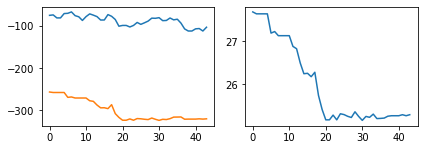

In [2]:
names = ['COMP', 'BIC', 'SSE', 'A0', 'A1','A2', 'EQLAT', 'EQSYMPY']
a = pd.read_csv("./merma_common_6_vars_2.txt", sep= ',', names=names)



x = [i  for i in range(len(a))]
comp = np.asarray(a.COMP)
bic = np.asarray(a.BIC)
sse = np.asarray(a.SSE)

        

plt.figure(1)
plt.subplot(221)
plt.plot(x, comp)
plt.plot(x, bic)
plt.subplot(222)
plt.plot(x, sse)
plt.tight_layout()
plt.show()


In [3]:
def filtrer(tres_comp, tres_bic, tres_sse, a):
    a = a[(a.COMP<tres_comp)]
    a = a[(a.BIC<tres_bic)]
    a = a[(a.SSE<tres_sse)]
    return a

In [4]:
Data = pd.read_csv("./merma_common_6_vars_1.csv")
E = Data["E"]
merma = Data["merma"]
Metal_labels = ["pd", "pt", "ni", "co", "ir", "rh", "cu", "ag", "au"]

Data['MOG'] = Data['MOG']/96.484934

Data.head()

metal         E      homo  ncoord    IE   Z       MOG  min_MCe3  m_MCe3  \
0    co -1.254532 -4.173892       4  33.5  27  0.041303      0.71    1.47   
1    co -1.252940 -4.173892       4  33.5  27  0.041303      0.71    1.47   
2    co -1.248888 -4.173892       4  33.5  27  0.041303      0.71    1.29   
3    co -1.242027 -4.173892       4  33.5  27  0.041303      0.71    1.29   
4    co -1.235380 -4.173892       4  33.5  27  0.041303      0.71    1.29   

   m_Ce3  min_Ce3     r       opc  \
0   1.28     1.00  1.26  1.666667   
1   1.28     1.00  1.26  1.666667   
2   1.41     1.41  1.26  1.666667   
3   1.41     1.41  1.26  1.666667   
4   1.14     1.00  1.26  1.333333   

                                          plot_label     merma  
0  M: Co; Coord: 4; OS: 3; IDs: 28_32_33; mean(d-... -0.224039  
1  M: Co; Coord: 4; OS: 3; IDs: 31_33_35; mean(d-... -0.222447  
2  M: Co; Coord: 4; OS: 3; IDs: 28_32_36; mean(d-... -0.218395  
3  M: Co; Coord: 4; OS: 3; IDs: 30_31_35; mean(d-... -0.211534  
4  M: Co; Coord: 4; OS: 3; IDs: 31_32_35; mean(d-... -0.204887

In [5]:
filt = filtrer(1200,1200,25.4, a)
filt

COMP         BIC        SSE         A0        A1         A2  \
20  -99.716653 -323.093606  25.170806  -0.885114  1.000000   0.265786   
21  -99.716653 -323.093606  25.170806  -0.885114  1.000000   0.265786   
22 -103.320109 -320.039651  25.280704  -0.842413  1.000000   0.279955   
23  -99.716653 -323.093606  25.170806  -0.885114  1.000000   0.265786   
24  -92.678664 -319.178598  25.311776  -1.216765  1.000000   0.336116   
25  -97.173968 -319.705551  25.292756   1.000000 -0.901027   0.419429   
26  -93.498610 -320.818490  25.252632   1.000000 -0.875885   8.713841   
27  -89.501970 -321.575554  25.225374   1.000000 -0.902859  11.029444   
28  -82.564938 -317.912408  25.357537   1.000000 -0.878694   7.429235   
29  -82.927645 -320.889986  25.250056   1.000000 -0.896836  11.548374   
30  -81.436490 -323.437849  25.158449   1.000000 -0.905356  13.289698   
31  -88.427214 -320.886616  25.250178   1.000000 -0.896457   9.481269   
32  -87.986924 -321.470105  25.229169   1.000000 -0.895185   9.944823   
33  -82.182514 -319.399723  25.303793   1.000000 -0.988624  22.605026   
34  -86.578969 -315.729551  25.199963   0.552485 -0.877323   3.035833   
35  -85.050731 -315.604633  25.204454   5.971702 -0.862595   0.791217   
36  -94.288720 -315.406038  25.211596   0.762202 -0.864609   8.367272   
37 -107.906344 -320.748466  25.255154  21.629156 -0.894425   1.000000   
38 -112.858599 -320.442057  25.266196   1.000000 -0.900683  23.043260   
39 -112.858599 -320.442057  25.266196   1.000000 -0.900683  23.043260   
40 -107.753139 -320.442057  25.266196   1.000000 -0.900683  46.086521   
41 -107.029373 -319.786114  25.289849   1.000000 -0.900563  12.165074   
42 -112.858599 -320.442057  25.266196   1.000000 -0.900683  23.043260   
43 -103.929794 -319.786114  25.289849  -0.982765  1.000000   0.082203   

                                                EQLAT  \
20  \[\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe...   
21  \[\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe...   
22  \[\frac{c_{1} opc \sin{\left (opc^{2} \right )...   
23  \[\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe...   
24  \[\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe...   
25  \[\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe...   
26  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
27  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
28  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
29  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
30  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
31  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
32  \[\frac{opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}...   
33  \[\frac{2 opc \left(m_{Ce3} + \frac{m_{MCe3}^{...   
34  \[\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe...   
35  \[\frac{c_{1}^{m_{MCe3}} opc \left(m_{Ce3} + \...   
36  \[\frac{c_{1}^{m_{MCe3}} opc \left(m_{Ce3} + \...   
37  \[\frac{opc^{2} \left(m_{Ce3} + \frac{m_{MCe3}...   
38  \[\frac{opc^{2}}{c_{2} m_{Ce3}} \left(m_{Ce3} ...   
39  \[\frac{opc^{2}}{c_{2} m_{Ce3}} \left(m_{Ce3} ...   
40  \[\frac{2 opc^{2}}{c_{2} m_{Ce3}} \left(m_{Ce3...   
41  \[\frac{opc}{c_{2} m_{Ce3}} \left(m_{Ce3} + \f...   
42  \[\frac{opc^{2}}{c_{2} m_{Ce3}} \left(m_{Ce3} ...   
43  \[\frac{c_{1} opc}{m_{Ce3}} \left(m_{Ce3} + \f...   

                                              EQSYMPY  
20  (((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) ...  
21  (((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) ...  
22  (((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) ...  
23  (((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) ...  
24  (((m_Ce3 + (m_MCe3 / ((_a0_ + _a2_) / m_MCe3))...  
25  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
26  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
27  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
28  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
29  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
30  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
31  (((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) ...  
32  (((m_Ce3 + (m_MCe3 / (_a1_

In [6]:
filt.EQSYMPY.values

array(['(((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 * exp(_a2_)) + m_Ce3) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 * exp(_a2_)) + m_Ce3) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 * m_MCe3) + m_Ce3) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 * exp(_a2_)) + m_Ce3) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / ((_a0_ + _a2_) / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 * (m_Ce3 + _a2_)) + opc) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 + (m_Ce3 + _a2_)) + opc) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) * (m_Ce3 / ((((m_MCe3 + (m_Ce3 + (_a2_ * m_Ce3))) + m_MCe3) * m_Ce3) / sin((opc ** 2)))))',
       '(((m_Ce3 + (m_MCe3 / (_a1_ / m_MCe3))) * opc) * (m_Ce3 / (((

In [7]:
#item = [i for i in range(len(filt)) if filt.EQSYMPY.values[i] =='cos(-(((((((Z ** _a4_) * _a0_) + _a3_) + ((_a1_ * m_Ce3_l) / (Z + ((r / (r ** 2)) * ncoord)))) + ((_a0_ / r) / (_a3_ + ncoord))) + (r + _a1_))))']
#this comes from t_1
item = [i for i in range(len(filt)) if filt.EQSYMPY.values[i] =='(((m_Ce3 + (m_MCe3 / (_a0_ / m_MCe3))) * opc) * (_a2_ / ((((m_MCe3 * exp(_a2_)) + m_Ce3) * m_Ce3) / sin((opc ** 2)))))']

a0 = float(filt.A0.values[item][0])
a1 = float(filt.A1.values[item][0])
a2 = float(filt.A2.values[item][0])




pars = [ np.asarray([a0 for _ in range(len(Data))]), 
        np.asarray([a1 for _ in range(len(Data))]),
        np.asarray([a2 for _ in range(len(Data))])]

pars_manual = [a0, a1, a2]
pars_manual


[-0.885114, 1.0, 0.265786]

In [8]:
eq_lat = filt.EQLAT.values[item][0][2:-2]
display(Latex(f'$%s$'%eq_lat))

<IPython.core.display.Latex object>

In [9]:
print(eq_lat)

\frac{c_{1} opc \left(m_{Ce3} + \frac{m_{MCe3}^{2}}{c_{2}}\right) \sin{\left (opc^{2} \right )}}{m_{Ce3} \left(m_{Ce3} + m_{MCe3} e^{c_{1}}\right)}


25.17080631312473
0.22583997840787962


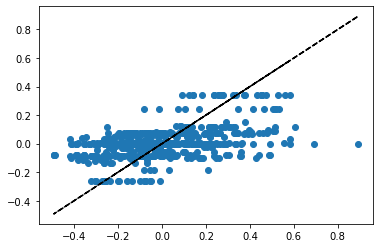

In [10]:
eq = filt.EQSYMPY.values[item]
eq_to_lam = sympify(eq)



opc = symbols('opc')
m_MCe3 = symbols('m_MCe3')
m_Ce3 = symbols('m_Ce3')


_a0_ = symbols('_a0_')
_a1_ = symbols('_a1_')
_a2_ = symbols('_a2_')




Reduced = ["opc", "m_MCe3", "m_Ce3"]
variables = [opc, m_MCe3, m_Ce3]
params = [_a0_, _a1_, _a2_]
eq_to_sp =lambdify(variables+params ,eq_to_lam)



args = [i for i in np.asarray(Data[Reduced]).T] + [j for j in pars]
fitting_symp = eq_to_sp(*args)
sse = sum( (fitting_symp[0] - merma)**2)
ss_tot = np.sum((merma-np.mean(merma))**2)
r_squared = 1 - (sse / ss_tot)
print(sse)
print(r_squared)


plt.scatter(merma, fitting_symp[0])
plt.plot(merma, merma, "--", color="black")
plt.show()

In [11]:
def get_results(func, Data, labels, pars, E):
    X = np.asarray(Data[labels]).T
    params, covar = curve_fit(func,X, E, p0=pars)
    fitting = func(X, *params )
    sse = sum( (fitting - E)**2)
    rmse = np.sqrt(sse/len(E))
    MAE = sum(abs(fitting-E))/len(E)
    ss_tot = np.sum((E-np.mean(E))**2)
    r_squared = 1 - (sse / ss_tot)
    res_dict = {"SSE": sse, "MAE": MAE, "r_sq": r_squared,"rmse":rmse,"fitting": fitting}
    return res_dict, params

def eval_func(func, Data, labels, pars, E):
    X = np.asarray(Data[labels]).T
    fitting = func(X, *pars )
    sse = sum( (fitting - E)**2)
    MAE = sum(abs(fitting-E))/len(E)
    ss_tot = np.sum((E-np.mean(E))**2)
    r_squared = 1 - (sse / ss_tot)
    res_dict = {"SSE": sse, "MAE": MAE, "r_sq": r_squared, "fitting": fitting}
    return res_dict
    

def plotter(x, y):
    plt.plot(y, y, "--", color="black")
    plt.scatter(x, y)
    plt.show()
    return

In [12]:
Reduced = ["opc", "m_MCe3", "m_Ce3"]
def merma_1(x, p1, p2, p3):
    r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2]) 
                                                          * x[2]) / np.sin((x[0] ** 2)))))
    return r
result_merma, _ = get_results(merma_1, Data, Reduced, pars_manual, merma)
print(max(result_merma["fitting"]))
print(min(result_merma["fitting"]))

0.33788208655566404
-0.2605339539253492


<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])
/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1.964079893517081
-2.1135029370203964


(array([452.,  81.,  45., 123.]),
 array([-2.11350294, -1.09410723, -0.07471152,  0.94468419,  1.96407989]),
 <BarContainer object of 4 artists>)

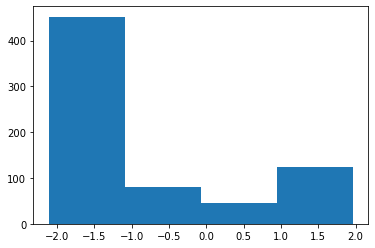

In [13]:
Reduced = ["opc", "m_MCe3", "m_Ce3"]
def merma_1_1(x, p1, p2, p3):
    r =  x[0] * np.sin(x[0] ** 2)
    return r
result_merma_1 = eval_func(merma_1_1, Data, Reduced, pars_manual, merma)
print(max(result_merma_1["fitting"]))
print(min(result_merma_1["fitting"]))

plt.hist(result_merma_1["fitting"], bins=4)
                       
                       

(array([  7.,   0.,   0.,  20.,   2., 120., 415.,  37.,  84.,  16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

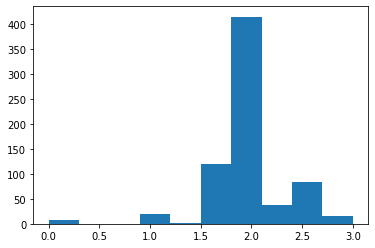

In [14]:
plt.hist(Data["opc"], bins=10)

[0.0, 0.8414709848078965, 1.3039872713479463, 1.1671097953318819, 0.6249550426525304, -1.5136049906158564, -2.1135029370203964, -1.7570570281154694, -0.08294804136889204, 1.8940550483443137, 1.2363554557252698]


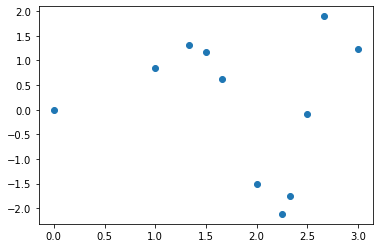

In [15]:
opc_values = [0,1,1.33,1.5,1.66,2,2.25,2.33,2.5,2.66,3]
SIN_opc = [i*np.sin(i**2) for i in opc_values]
print(SIN_opc)
plt.scatter(opc_values, SIN_opc)
plt.show()

In [16]:
Reduced_main = ["ncoord", "Z", "MOG", "r"]
def func_main_5(x, p1, p2, p3, p4, p5, p6):
    r = (((((((((p6 * (p6 * x[0])) ** 2) * (p5 + x[0])) * (x[1] ** (p1 / (x[3] + p4)))) 
             + ((x[3] * p6) + (-(p4) ** x[0]))) * (x[2] * x[3])) * x[2]) 
          + np.sin((((p4 ** 2) ** 2) + x[0]))) + np.log(x[3]))
    return r
par_main = [-44.498602000000005, 1.0, 1.0, 5.786898000000001,
                                                 -4.559913, 487.688501]
result_main, _ = get_results(func_main_5, Data, Reduced_main,par_main, E)
len(result_main["fitting"])

701

0.18931829288244997
38.71279410518549
0.235000209746425
0.8753160848510564


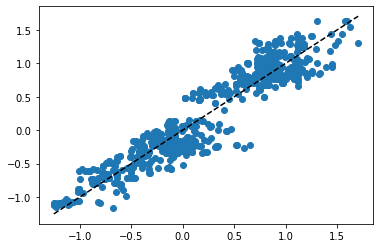

In [17]:
total_fit = result_main["fitting"] + fitting_symp[0]
sse = sum( (total_fit - E)**2)
rmse = np.sqrt(sum( (total_fit - E)**2)/len(E))
ss_tot = np.sum((E-np.mean(E))**2)
r_squared = 1 - (sse / ss_tot)
MAE = sum(abs(total_fit-E))/len(E)
print(MAE)
print(sse)
print(rmse)
print(r_squared)

fig = plt.figure(1)
plt.scatter(E, total_fit)
plt.plot(E, E, "--", color="black")
plt.show()
fig.savefig("main_good_fin.png")

In [18]:
To_Julian_End = pd.DataFrame({"Metal_Only":result_main["fitting"], "Complete_fit":total_fit, "Label":Data["plot_label"]})
To_Julian_End.to_csv("./BMS_output_final.csv", sep=",", index=False)


/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


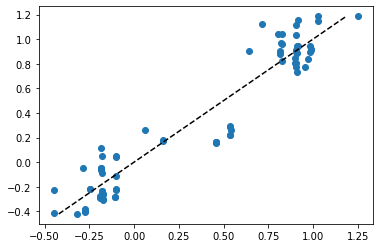

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


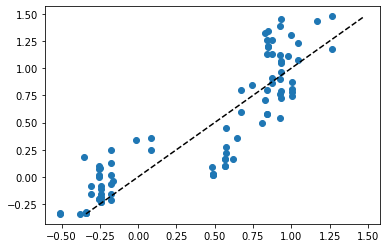

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


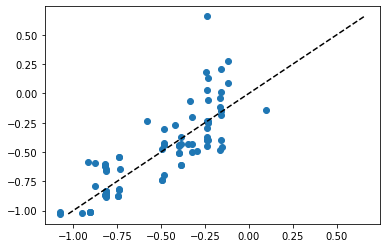

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


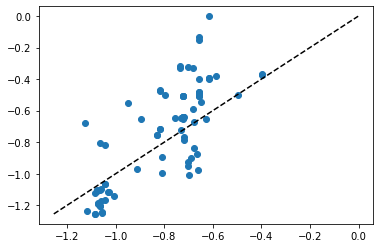

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


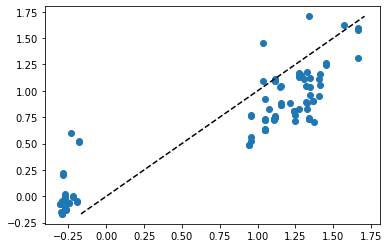

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


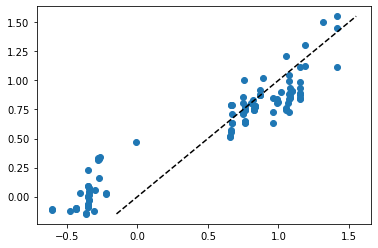

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


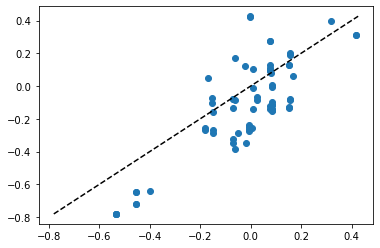

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


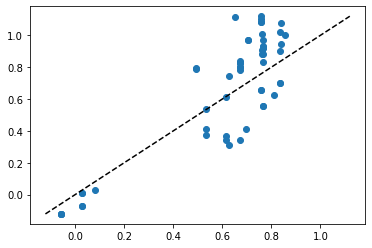

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


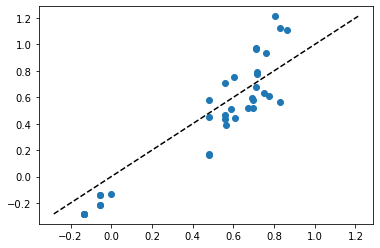

In [19]:
def Standard_Deviation(x, x_mean):
    r = sum( [(i-x_mean)**2 for i in x] )
    R = np.sqrt(r/(len(x)-1))
    return R
data_test = [Data.loc[Data["metal"]!=i] 
             for i in Metal_labels]
data_train = [Data.loc[Data["metal"]==i] 
              for i in Metal_labels]

E_test = [i["E"] for i in data_test]
E_train = [i["E"] for i in data_train]

E_test_merma = [i["merma"] for i in data_test]
E_train_merma = [i["merma"] for i in data_train]

sse_test = []
rsq_test = []
MAE_test = []
RMSE_test = []
fittings = []
for i,j,k,l,m,n in zip(data_test, E_test, data_train, E_train, 
                           E_test_merma, E_train_merma):
    _,par = get_results(func_main_5, i, Reduced_main, par_main, j)
    _,p_merma = get_results(merma_1, i, Reduced, pars_manual, m)
    result_locv = eval_func(func_main_5, k, Reduced_main, par, l)
    fitting_merma = eval_func(merma_1, k, Reduced, p_merma, n)
    full_res = result_locv["fitting"]+fitting_merma["fitting"]
    plotter(full_res, l)
    sse = sum((np.asarray(l)-full_res)**2)
    sse_test.append(sse)
    RMSE_test.append(np.sqrt( sum( (np.asarray(l)-full_res)**2)/len(l)) )
    ss_tot = np.sum((np.asarray(l)-np.mean(l))**2)
    r_squared = 1 - (sse / ss_tot)
    rsq_test.append(r_squared)
    MAE = sum(abs(full_res-np.asarray(l)))/len(l)
    MAE_test.append(MAE)


In [20]:
Mean_mae = np.mean(MAE_test)
std_mae = Standard_Deviation(MAE_test, Mean_mae)
print(Mean_mae)
print(std_mae)

Mean_sse = np.mean(sse_test)
std_sse = Standard_Deviation(sse_test, Mean_sse)

print(Mean_sse)
print(std_sse)

Mean_rsq = np.mean(rsq_test)
std_rsq = Standard_Deviation(rsq_test, Mean_rsq)

print(Mean_rsq)
print(std_rsq)

Mean_rmse = sum(RMSE_test)/len(RMSE_test)
std_rmse = Standard_Deviation(RMSE_test, Mean_rmse)
print(Mean_rmse)
print(std_rmse)


0.18906613753084514
0.05115329536255697
4.594118324235379
3.393638544248274
0.6732370498192238
0.14838572986865398
0.2268647595302841
0.05757657312469816


/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


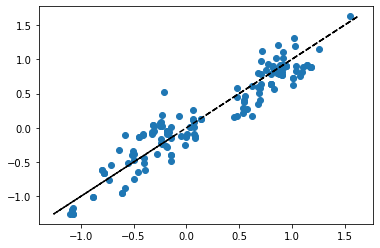

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


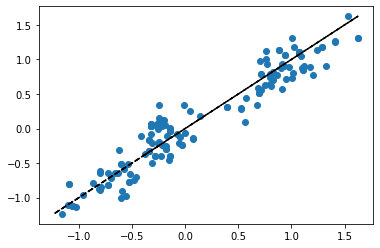

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


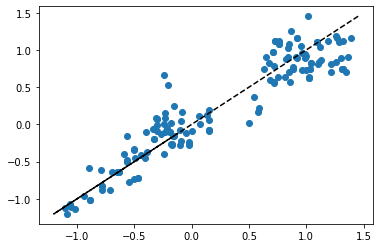

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


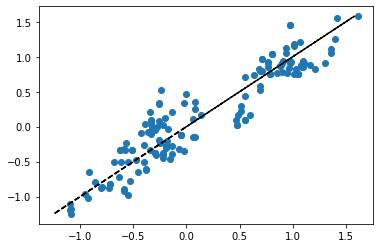

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


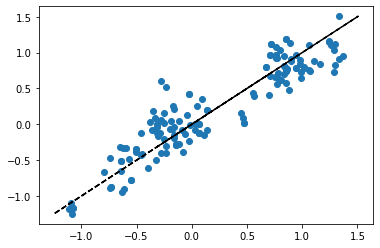

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


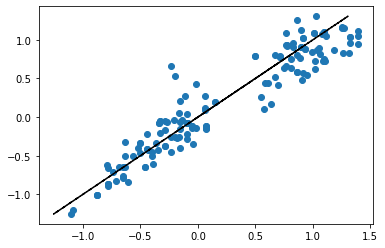

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


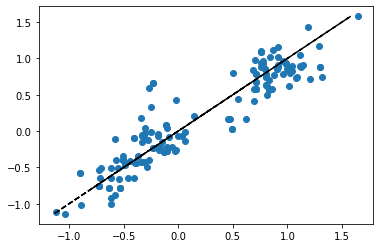

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


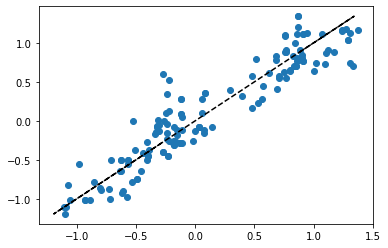

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


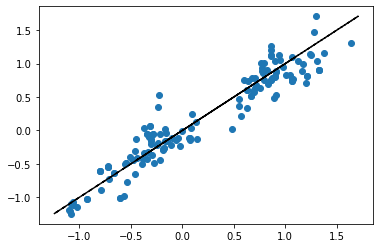

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


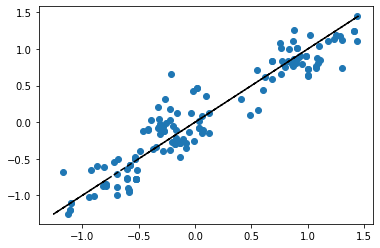

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


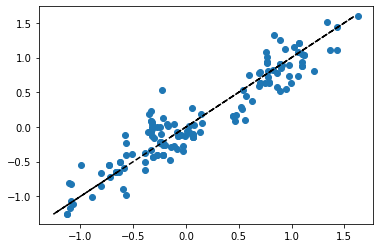

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


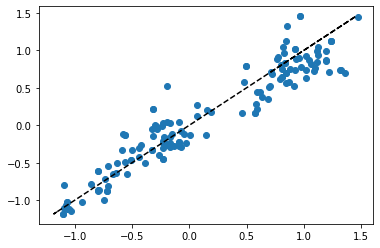

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


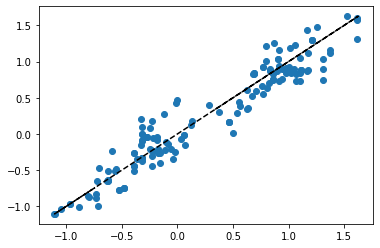

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


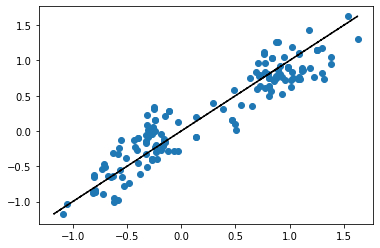

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


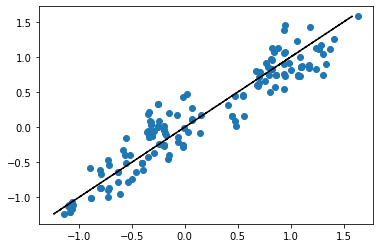

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


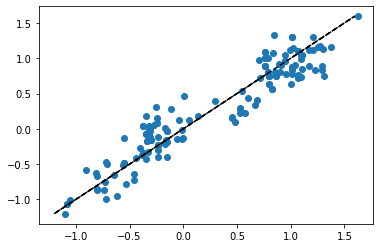

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


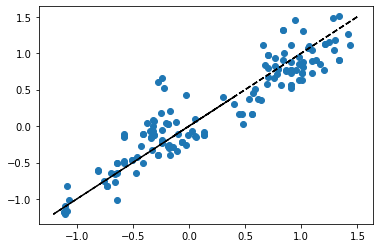

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


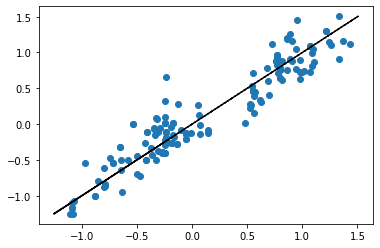

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


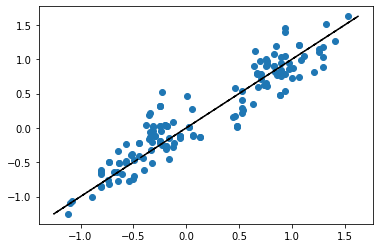

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


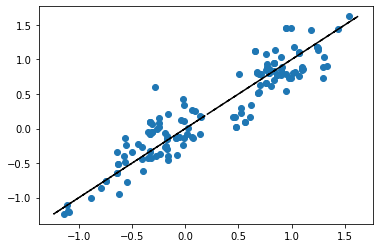

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


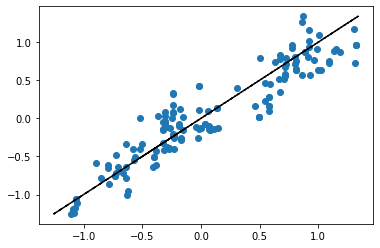

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


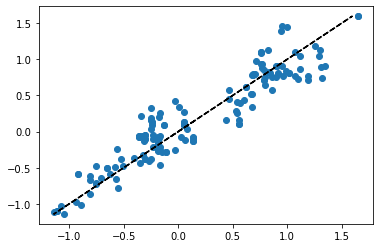

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


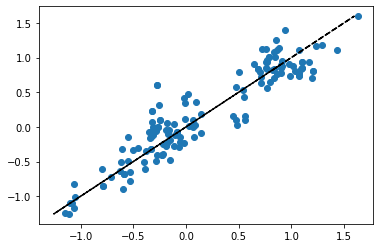

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


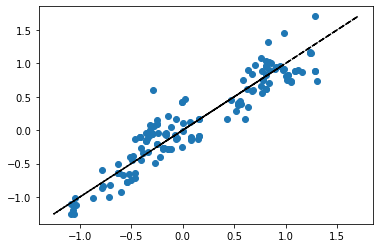

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


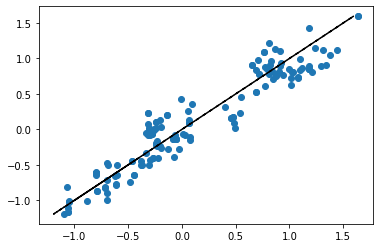

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


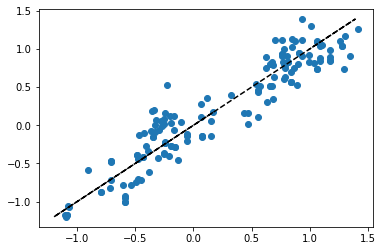

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


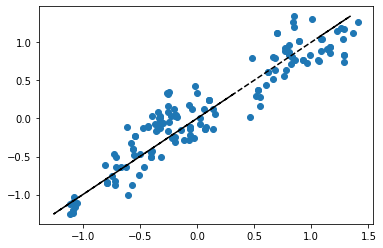

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


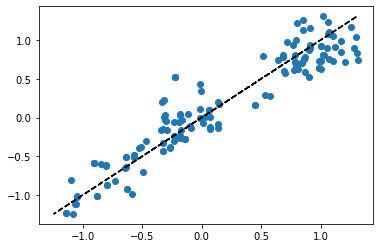

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


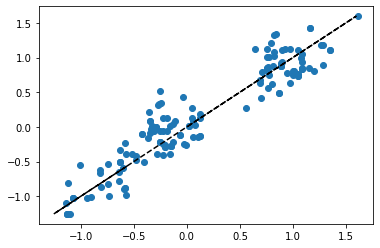

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


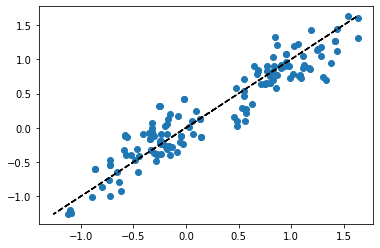

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


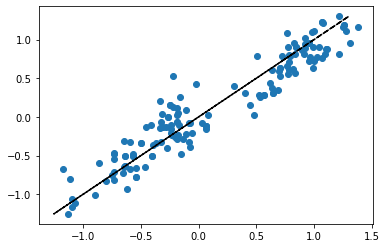

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


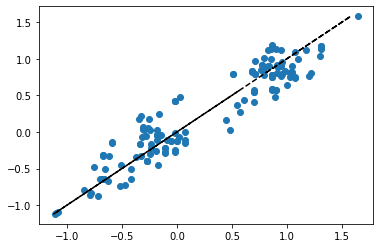

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


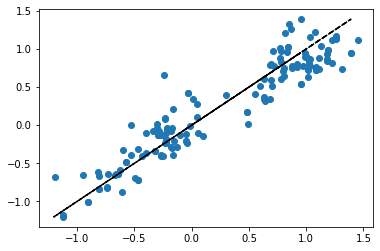

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


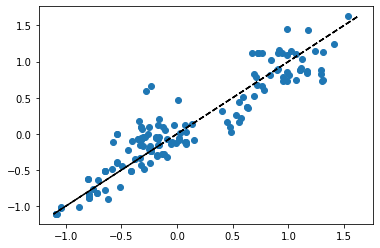

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


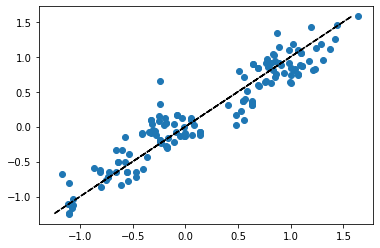

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


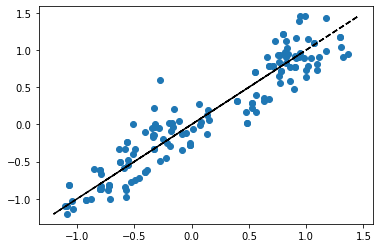

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


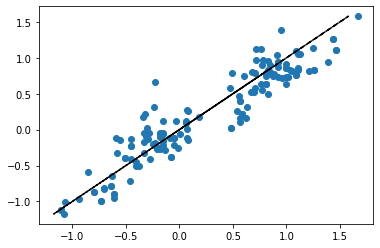

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


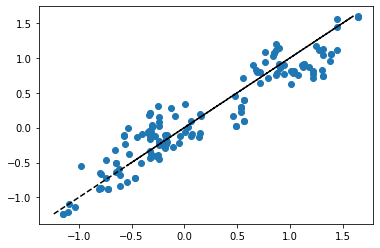

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


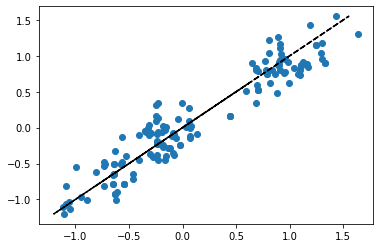

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


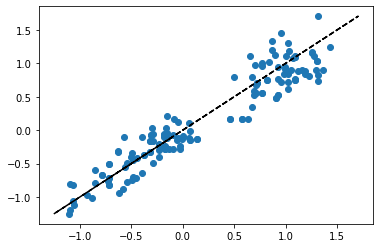

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


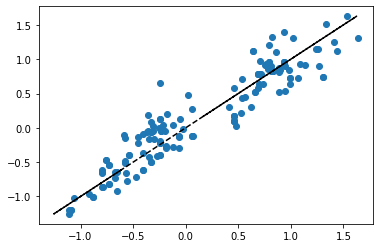

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


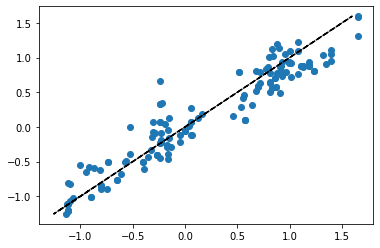

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


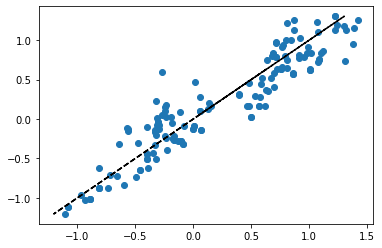

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


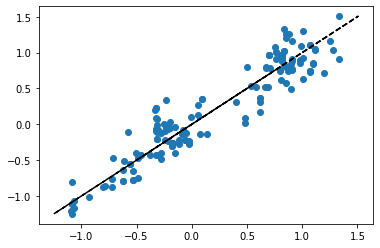

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


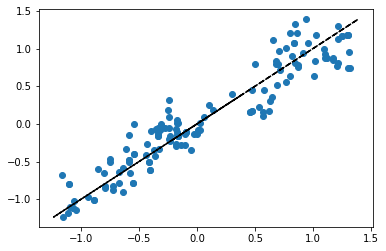

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


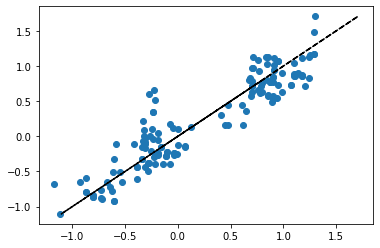

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


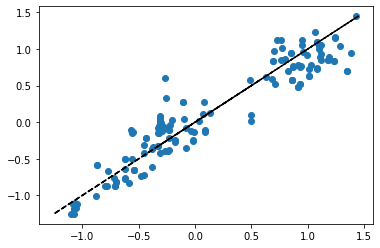

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


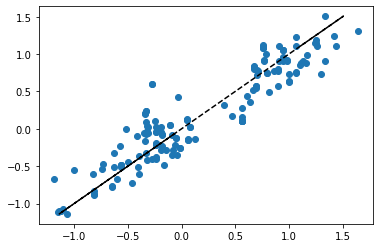

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


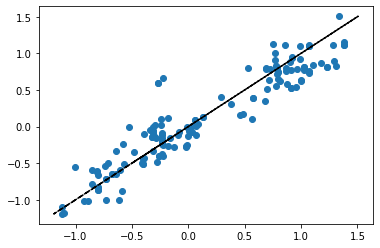

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


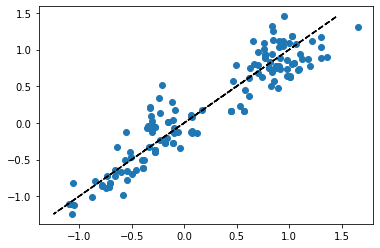

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


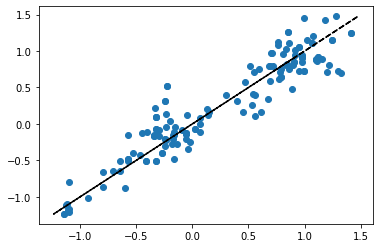

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


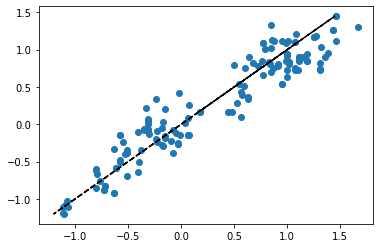

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


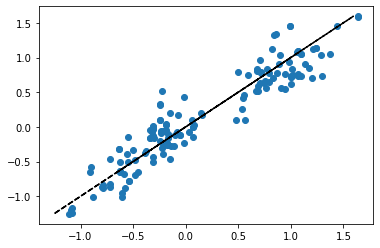

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


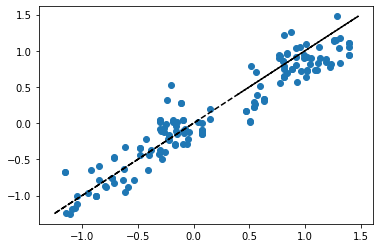

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


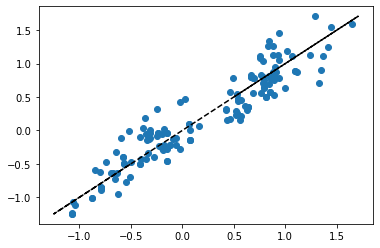

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


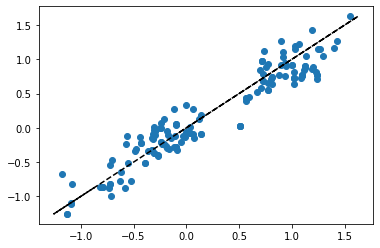

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


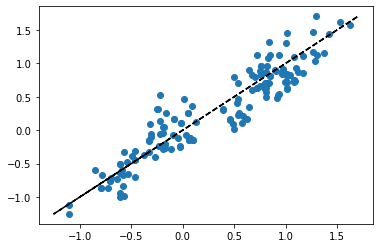

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


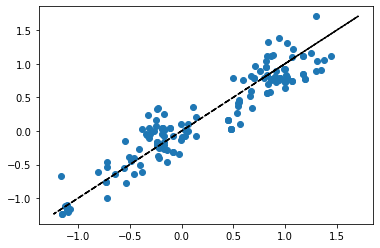

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


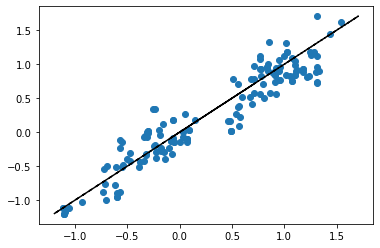

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


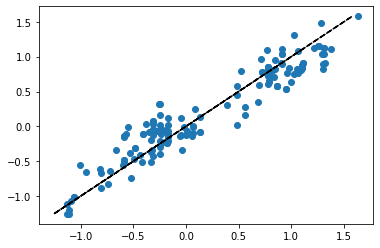

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


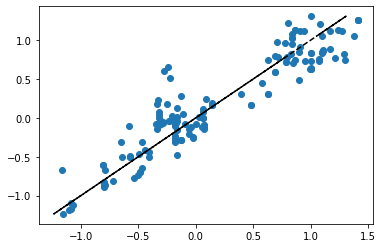

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


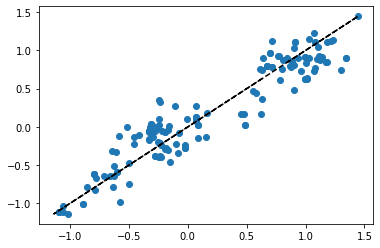

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


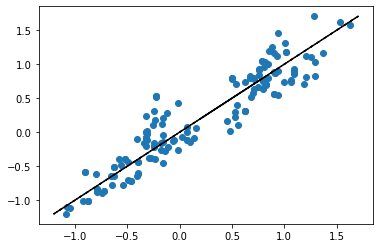

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


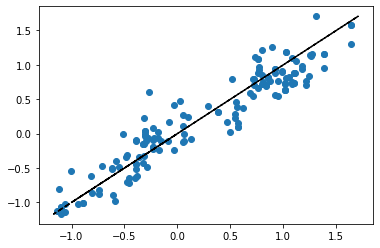

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


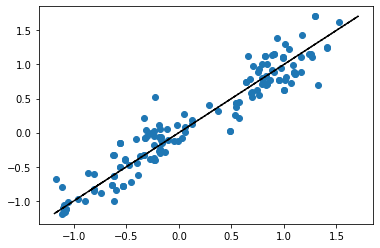

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


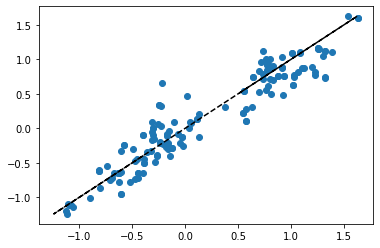

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


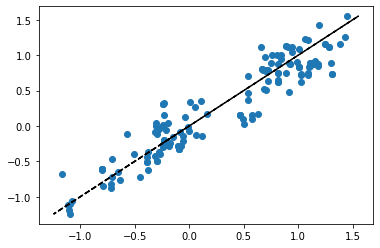

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


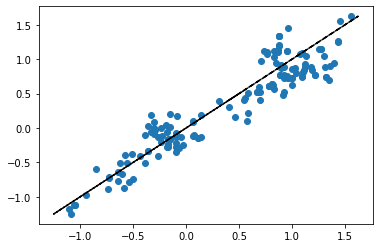

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


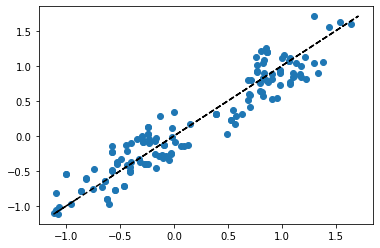

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


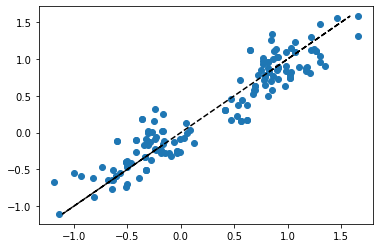

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


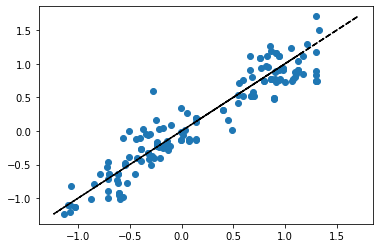

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


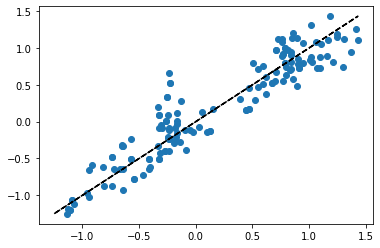

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


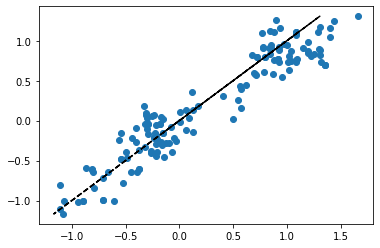

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


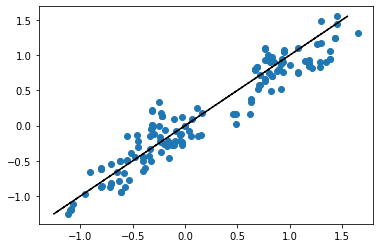

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


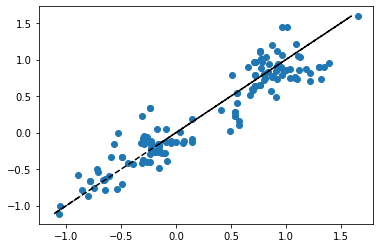

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


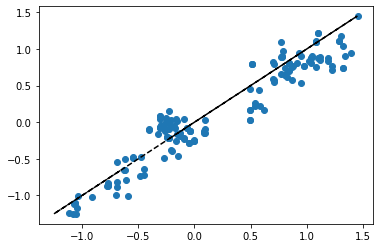

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


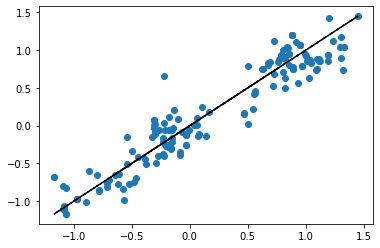

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


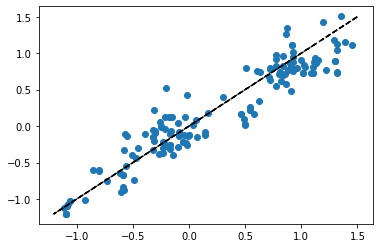

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


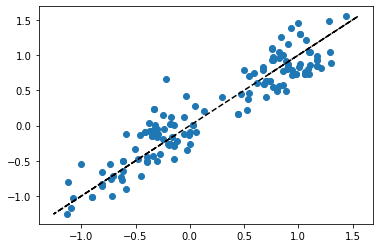

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


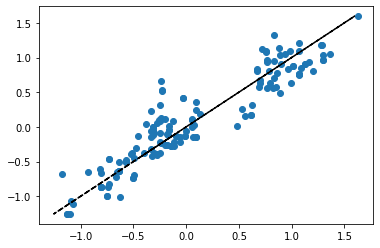

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


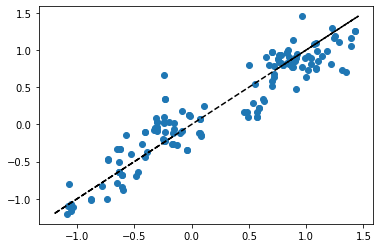

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


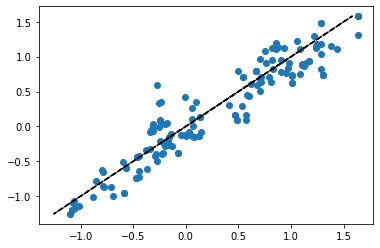

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


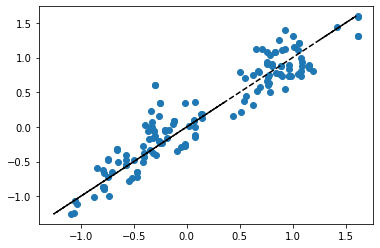

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


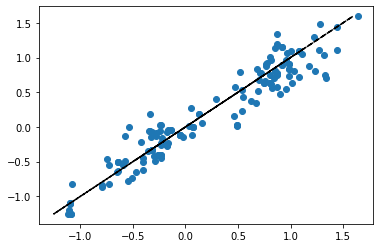

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


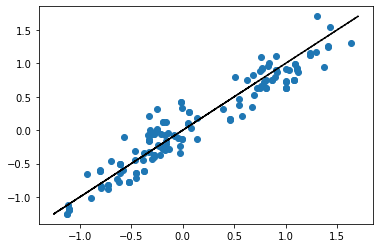

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


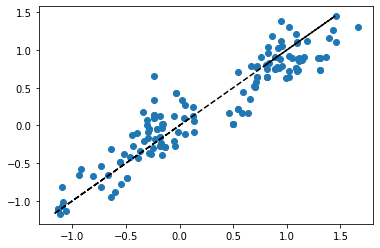

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


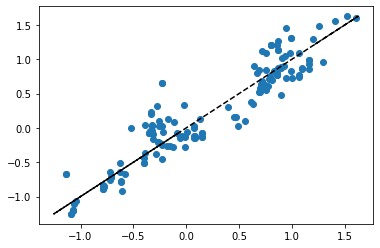

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


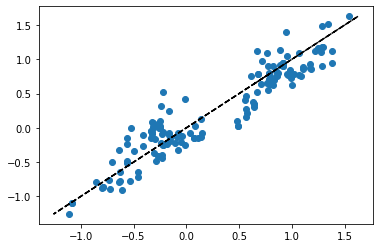

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


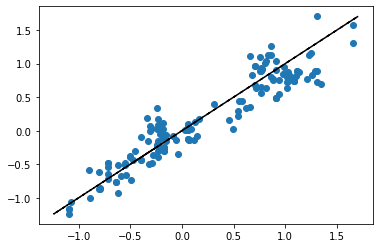

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


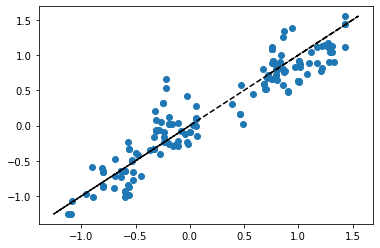

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


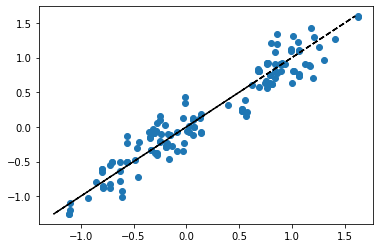

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


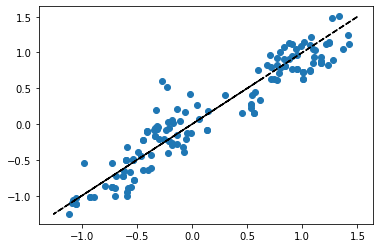

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


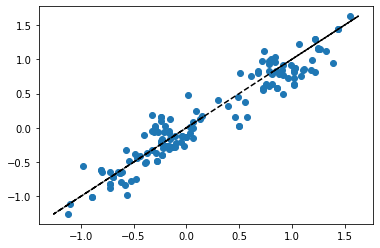

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


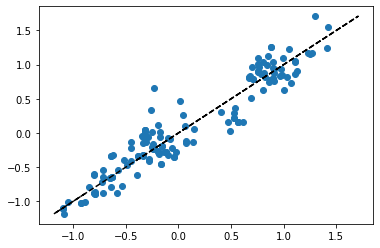

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


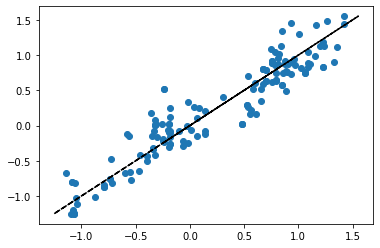

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


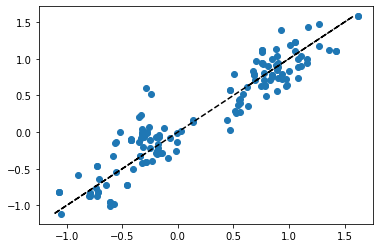

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


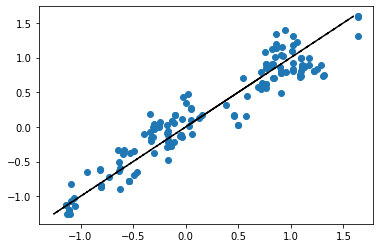

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


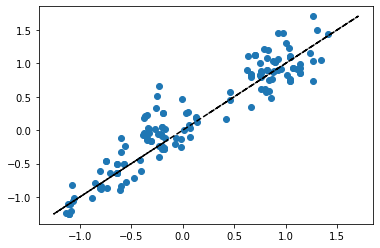

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


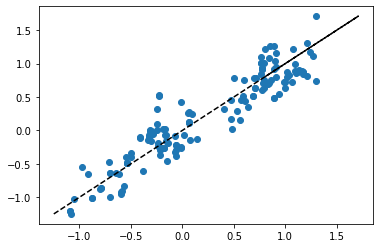

/home/jgeiger/anaconda3/envs/ceria_sac/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-12-c53ba3deb5d7>:3: RuntimeWarning: divide by zero encountered in true_divide
  r = (((x[2] + (x[1] / (p1 / x[1]))) * x[0]) * (p3 / ((((x[1] * np.exp(p3)) + x[2])


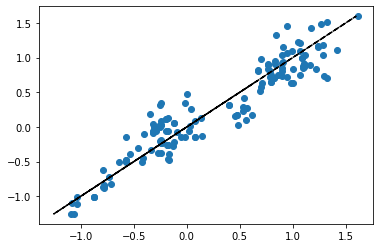

In [21]:
Val_MAE = []
Val_rmse = []
Val_rsq = []
Val_sse = []

Val_main_MAE = []
Val_main_MAE = []
Val_main_rmse = []
Val_main_rsq = []
Val_main_sse = []
for _ in range(100):
    ints_test = np.random.randint(0, len(Data), 150)
    ints_train = [i for i in range(len(Data)) if i not in ints_test]
    test_data = Data.iloc[ints_test]
    E_test = test_data["E"]
    merma_test = test_data["merma"]
    train_data = Data.iloc[ints_train]
    E_train = train_data["E"]
    merma_train = train_data["merma"]
    
    
    _,par = get_results(func_main_5, train_data, Reduced_main, par_main, E_train)
    _,p_merma = get_results(merma_1, train_data, Reduced, pars_manual, merma_train)
    result_val = eval_func(func_main_5, test_data, Reduced_main, par, E_test)
    sse_main = sum((np.asarray(E_test)-result_val["fitting"])**2)
    Val_main_sse.append(sse_main)
    rmse_main = np.sqrt(sse_main/len(E_test))
    Val_main_rmse.append(rmse_main)
    ss_tot = np.sum((np.asarray(E_test)-np.mean(E_test))**2)
    r_squared_main = 1 - (sse_main / ss_tot)
    Val_main_rsq.append(r_squared_main)
    MAE_main = sum(abs(result_val["fitting"]-np.asarray(E_test)))/len(E_test)
    Val_main_MAE.append(MAE_main)
    
    
    fitting_merma = eval_func(merma_1, test_data, Reduced, p_merma, merma_test)
    full_res = result_val["fitting"]+fitting_merma["fitting"]
    plotter(full_res, E_test)
    sse = sum((np.asarray(E_test)-full_res)**2)
    Val_sse.append(sse)
    rmse = np.sqrt(sse/len(E_test))
    Val_rmse.append(rmse)
    r_squared = 1 - (sse / ss_tot)
    Val_rsq.append(r_squared)
    MAE = sum(abs(full_res-np.asarray(E_test)))/len(E_test)
    Val_MAE.append(MAE)

In [22]:
mean_MAE_Val_main = np.mean(Val_main_MAE)
std_val_mae_main = Standard_Deviation(Val_main_MAE, mean_MAE_Val_main)
print(mean_MAE_Val_main)
print(std_val_mae_main)

mean_rsq_Val_main = np.mean(Val_main_rsq)
std_val_rsq_main = Standard_Deviation(Val_main_rsq, mean_rsq_Val_main)
print(mean_rsq_Val_main)
print(std_val_rsq_main)

mean_rmse_Val_main = np.mean(Val_main_rmse)
std_val_rmse_main = Standard_Deviation(Val_main_rmse, mean_rmse_Val_main)
print(mean_rmse_Val_main)
print(std_val_rmse_main)

0.20423882422485864
0.010979273995386897
0.8536675909193443
0.018592351878728146
0.2548209136618981
0.013575994625058636


In [23]:
mean_MAE_Val = np.mean(Val_MAE)
std_val_mae = Standard_Deviation(Val_MAE, mean_MAE_Val)
print(mean_MAE_Val)
print(std_val_mae)

mean_rsq_Val = np.mean(Val_rsq)
std_val_rsq = Standard_Deviation(Val_rsq, mean_rsq_Val)
print(mean_rsq_Val)
print(std_val_rsq)

mean_rmse_Val = np.mean(Val_rmse)
std_val_rmse = Standard_Deviation(Val_rmse, mean_rmse_Val)
print(mean_rmse_Val)
print(std_val_rmse)

0.19074641073764342
0.01052188072739745
0.8729340747637125
0.01745658692578172
0.23731459783699207
0.013019206324074646


-0.0008568164784463138
-1.5620529548220299
['co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'co', 'ni', 'ni', 'co', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'co', 'ni', 'ni', 'ni', 'co', 'ni', 'co', 'ni', 'co', 'cu', 'cu', 'cu', 'cu', 'co', 'co', 'co', 'ni', 'ni', 'co', 'cu', 'co', 'cu', 'co', 'ni', 'co', 'co', 'ni', 'co', 'co', 'co', 'ni', 'co', 'cu', 'co', 'cu', 'cu', 'co', 'ni', 'co', 'co', 'co', 'co', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'co', 'ni', 'co', 'co', 'ni', 'ni', 'ni', 'co', 'co', 'ni', 'co', 'co', 'co', 'co', 'co', 'ni', 'co', 'co', 'ni', 'co', 'co', 'co', 'ni', 'co', 'ni', 'co', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'ni', 'co', 'ni', 'co', 'co', 'ni', 'co', 'cu', 'co', 'ni', 'co', 'co', 'ni', 'cu', 'cu', 'co', 'co', 'co', 'cu', 'co', 'ni', 'ni', 'cu', 'cu', 'cu', 'ni', 'cu', 'c

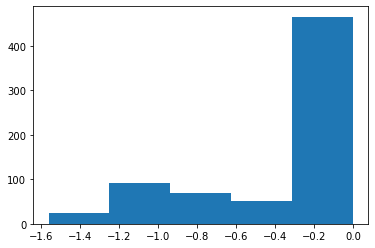

In [24]:
Reduced_main = ["ncoord", "Z", "MOG", "r"]
def func_main_5_1(x, p1, p2, p3, p4, p5, p6):
    r = (x[0]*x[2])**2*x[3]*x[1]**(p1/(x[3]+p4))*p6**4*(p5+x[0])
    return r
par_main = [-44.498602000000005, 1.0, 1.0, 5.786898000000001,
                                                 -4.559913, 487.688501]
result_1 = eval_func(func_main_5_1, Data, Reduced_main,par_main, E)
index_affects = [i for i in range(len(E)) if abs(result_1["fitting"][i])> 0.05]

print(max(result_1["fitting"]))
print(min(result_1["fitting"]))
metal_affects = [Data["metal"][i] for i in index_affects]
print(metal_affects)
counts_1 = plt.hist(result_1["fitting"], bins=5)
Term_3_dist = pd.DataFrame({"count":counts_1[0], "x":counts_1[1][:-1]})
Term_3_dist.to_csv("Term_3_dist.csv", index=False)
Actual_term_3 = pd.DataFrame({"term_3":result_1["fitting"], "plot_label":Data["plot_label"]})
Actual_term_3.to_csv("Actual_term_3.csv", index=False)

1.8155333419894526
0.574053761563184


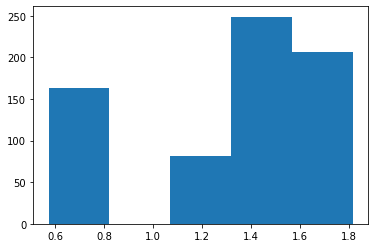

In [25]:
Reduced_main = ["ncoord", "Z", "MOG", "r"]
def func_main_5_2(x, p1, p2, p3, p4, p5, p6):
    r = (x[2] * x[3])**2*p6
    return r
par_main = [-44.498602000000005, 1.0, 1.0, 5.786898000000001,
                                                 -4.559913, 487.688501]
result_2 = eval_func(func_main_5_2, Data, Reduced_main,par_main, E)
print(max(result_2["fitting"]))
print(min(result_2["fitting"]))

counts_2 = plt.hist(result_2["fitting"], bins=5)
Term_2_dist = pd.DataFrame({"count":counts_2[0], "x":counts_2[1][:-1]})
Term_2_dist.to_csv("Term_2_dist.csv", index=False)

Actual_term_2 = pd.DataFrame({"term_2":result_2["fitting"], "plot_label":Data["plot_label"]})
Actual_term_2.to_csv("Actual_term_2.csv", index=False)


-0.027374059972254026
-3.0473648681565066


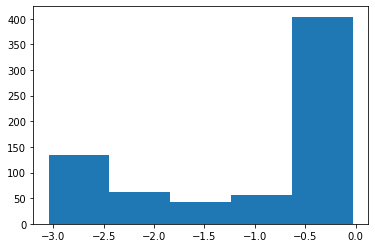

In [26]:
Reduced_main = ["ncoord", "Z", "MOG", "r"]
def func_main_5_3(x, p1, p2, p3, p4, p5, p6):
    r = -x[2]**2*x[3]*p4**x[0]
    return r
par_main = [-44.498602000000005, 1.0, 1.0, 5.786898000000001,
                                                 -4.559913, 487.688501]
result_3 = eval_func(func_main_5_3, Data, Reduced_main,par_main, E)
print(max(result_3["fitting"]))
print(min(result_3["fitting"]))
counts_3 = plt.hist(result_3["fitting"], bins=5)

Term_1_dist = pd.DataFrame({"count":counts_3[0], "x":counts_3[1][:-1]})
Term_1_dist.to_csv("Term_1_dist.csv", index=False)
Actual_term_1 = pd.DataFrame({"term_1":result_3["fitting"], "plot_label":Data["plot_label"]})
Actual_term_1.to_csv("Actual_term_1.csv", index=False)



0.4252677354043441
0.1906203596086497


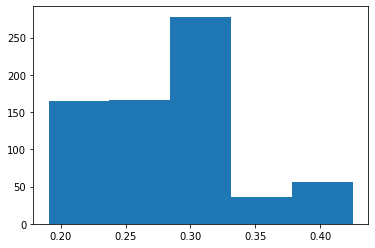

In [27]:
Reduced_main = ["ncoord", "Z", "MOG", "r"]
def func_main_5_4(x, p1, p2, p3, p4, p5, p6):
    r = np.log(x[3])
    return r
par_main = [-44.498602000000005, 1.0, 1.0, 5.786898000000001,
                                                 -4.559913, 487.688501]
result_4 = eval_func(func_main_5_4, Data, Reduced_main,par_main, E)
print(max(result_4["fitting"]))
print(min(result_4["fitting"]))

counts_4 = plt.hist(result_4["fitting"], bins=5)
Term_4_dist = pd.DataFrame({"count":counts_4[0], "x":counts_4[1][:-1]})
Term_4_dist.to_csv("Term_4_dist.csv", index=False)
Actual_term_4 = pd.DataFrame({"term_4":result_4["fitting"], "plot_label":Data["plot_label"]})
Actual_term_4.to_csv("Actual_term_4.csv", index=False)

0.695126971703339
-0.9429569733873328


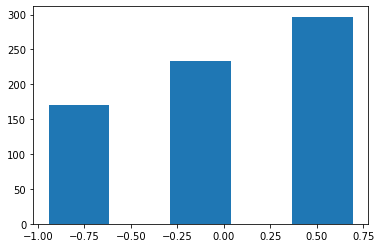

In [28]:
Reduced_main = ["ncoord", "Z", "MOG", "r"]
def func_main_5_5(x, p1, p2, p3, p4, p5, p6):
    r = np.sin(p4**4+x[0])
    return r
par_main = [-44.498602000000005, 1.0, 1.0, 5.786898000000001,
                                                 -4.559913, 487.688501]
result_5 = eval_func(func_main_5_5, Data, Reduced_main,par_main, E)
print(max(result_5["fitting"]))
print(min(result_5["fitting"]))

counts_5 = plt.hist(result_5["fitting"], bins=5)
Term_5_dist = pd.DataFrame({"count":counts_5[0], "x":counts_5[1][:-1]})
Term_5_dist.to_csv("Term_5_dist.csv", index=False)
Actual_term_5 = pd.DataFrame({"term_5":result_5["fitting"], "plot_label":Data["plot_label"]})
Actual_term_5.to_csv("Actual_term_5.csv", index=False)

In [29]:
result_main["fitting"] - (result_1["fitting"]+result_2["fitting"]+result_3["fitting"]+result_4["fitting"]+result_5["fitting"])

array([ 0.08820363,  0.08820363,  0.08820363,  0.08820363,  0.08820363,
        0.08820363,  0.08820363,  0.08820363,  0.08820363,  0.08820363,
        0.08820363,  0.08820363,  0.08820363,  0.08820363,  0.08820363,
        0.08820363,  0.08820363,  0.08820363,  0.08820363,  0.08820363,
        0.08820363,  0.04399558,  0.04399558,  0.04399558,  0.04399558,
        0.04399558,  0.04399558,  0.04399558,  0.03913277,  0.03913277,
        0.03913277,  0.08820363,  0.03913277,  0.03913277,  0.03913277,
        0.03913277,  0.04399558,  0.04399558,  0.03913277,  0.04399558,
        0.04399558,  0.04399558,  0.04399558,  0.04399558,  0.04399558,
        0.04399558,  0.04399558,  0.03913277,  0.04399558,  0.04399558,
        0.04399558,  0.08820363,  0.04399558,  0.08820363,  0.04399558,
        0.03913277, -0.01611373, -0.01611373, -0.01611373, -0.01611373,
        0.03913277, -0.03119775, -0.03119775, -0.03942819, -0.03942819,
        0.03913277, -0.01611373, -0.03119775, -0.01611373, -0.03

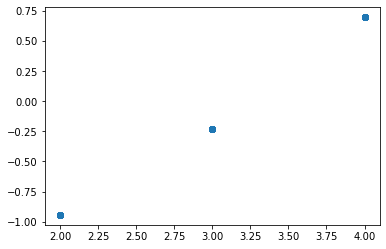

In [30]:
plt.scatter(Data["ncoord"], np.sin(5.786898000000001**4+Data["ncoord"]))

In [31]:
test_12 = result_3["fitting"] + result_2["fitting"] + result_1["fitting"]+result_5["fitting"]

val = test_12
val

array([-1.39134347, -1.39134347, -1.39134347, -1.39134347, -1.39134347,
       -1.39134347, -1.39134347, -1.39134347, -1.39134347, -1.39134347,
       -1.39134347, -1.39134347, -1.39134347, -1.39134347, -1.39134347,
       -1.39134347, -1.39134347, -1.39134347, -1.39134347, -1.39134347,
       -1.39134347, -1.03355915, -1.03355915, -1.03355915, -1.03355915,
       -1.03355915, -1.03355915, -1.03355915, -0.88713883, -0.88713883,
       -0.88713883, -1.39134347, -0.88713883, -0.88713883, -0.88713883,
       -0.88713883, -1.03355915, -1.03355915, -0.88713883, -1.03355915,
       -1.03355915, -1.03355915, -1.03355915, -1.03355915, -1.03355915,
       -1.03355915, -1.03355915, -0.88713883, -1.03355915, -1.03355915,
       -1.03355915, -1.39134347, -1.03355915, -1.39134347, -1.03355915,
       -0.88713883, -0.76134445, -0.76134445, -0.76134445, -0.76134445,
       -0.88713883, -0.83343401, -0.83343401, -0.54741391, -0.54741391,
       -0.88713883, -0.76134445, -0.83343401, -0.76134445, -0.83

0   -0.097043
1    0.009344
2   -0.095127
dtype: float64
0   -0.942957
1   -0.229344
2    0.695127
Name: Sin, dtype: float64


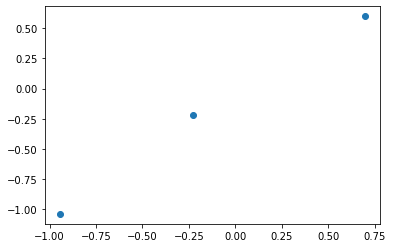

In [32]:
sin = [np.sin(5.786898000000001**4+i) for i in [2, 3, 4]]
Sin = pd.DataFrame({"Sin":sin, "x":[2, 3, 4]})
def test_sin(x, p1, p2):
    r = x*p1 + p2
    return r
print(0.82*Sin["x"]-2.68 - Sin["Sin"])
print(Sin["Sin"])
plt.scatter(Sin["Sin"], 0.82*Sin["x"]-2.68)
plt.show()

$c_{1} \left(\frac{ncoord}{c_{1} + \frac{c_{2}}{m_{Ce3 l} + sepd^{min_{MCe3 l}}}}\right)^{ncoord} + \sin{\left (\frac{c_{3}}{Z + \frac{c_{5}}{ncoord}} \left(Z + c_{2} + c_{4} + \sqrt{sepd}\right) \right )}$

$\sqrt{min_{MCe3 l}} + \frac{1}{c_{4}} \left(\frac{c_{1} c_{2}^{ncoord}}{c_{3} + e^{c_{3} m_{Ce3 l}}} + min_{MCe3 l} ncoord \left(c_{2} \cos{\left (ONN \right )} + \frac{\cos^{sepd}{\left (ncoord \right )}}{c_{2} + c_{4}}\right)\right)$

$c_{1} c_{2} \left(c_{1} c_{3}^{- ncoord} \sqrt{m_{Ce3 l}} ncoord + min_{MCe3 l} ncoord \left(\frac{c_{4}}{ONN + c_{5}} + \frac{c_{3}^{ncoord sepd}}{c_{2}}\right)\right) + \sqrt{min_{MCe3 l}}$

$\cos{\left (\frac{c_{1} c_{2}}{c_{5}} c_{3} \left(\frac{c_{3}}{\sin{\left (r \right )}} + c_{4} + \left(c_{3}^{sepd} + r\right) \cos{\left (c_{2} ncoord \right )}\right) e^{\frac{1}{c_{4}} \left(min_{MCe3 l} + ncoord\right)} \right )}$

$\cos{\left (Z + Z^{c_{1}} c_{2} + \frac{c_{2}}{r \left(c_{3} + ncoord\right)} + c_{4} + \frac{c_{5}}{Z^{2}} m_{Ce3 l} \right )}$

$\frac{1}{c_{5}} \left(c_{1} + \left(\frac{Z c_{2} ncoord^{2}}{c_{1}^{2} \left(c_{1} + m_{Ce3 l}\right)^{4}} + c_{3} ncoord\right)^{2 c_{3}^{- c_{4} - \frac{ncoord}{c_{3}}} c_{5}^{2} r}\right)$

$\cos{\left (Z^{c_{1}} c_{2} + \frac{c_{2}}{r \left(c_{3} + ncoord\right)} + c_{3} + \frac{c_{4} m_{Ce3 l}}{Z + \frac{ncoord}{r}} + c_{4} + r \right )}$

In [33]:
from sklearn.linear_model import LinearRegression
#xlabs = ["ncoord","mos","IEN","d","ONN"]
xlabs = ["ncoord", "Z", "sepd", "m_Ce3_l", "min_MCe3_l"]
X = np.asarray(Data[xlabs])
y = E

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
reg.coef_


KeyError: "['sepd', 'm_Ce3_l', 'min_MCe3_l'] not in index"

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn import svm, neighbors
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.gaussian_process.kernels import RationalQuadratic, Matern, ExpSineSquared, RBF, DotProduct

In [ ]:
Rf_forest = RandomForestRegressor(max_depth=3, n_estimators=150)
Rf_forest.fit(X, np.asarray(E))

In [ ]:
df_res = pd.DataFrame({"Experimental": np.asarray(E), "Predicted": Rf_forest.predict(X)})
df_res

In [ ]:
df_res['diff'] = (df_res['Experimental'] - df_res['Predicted'])**2
df_res['sse'] = sum(df_res['diff'])
df_res['score'] = Rf_forest.score(X, np.asarray(E))
df_res['MAE'] = sum(abs(df_res['Experimental']-df_res['Predicted']))/len(E)

In [ ]:
print(df_res['sse'][0])
print(df_res['score'][0])
print(df_res['MAE'][0])

In [ ]:
plt.scatter(df_res["Experimental"], df_res["Predicted"])
plt.plot(E, E, "--", color="black")
plt.show()